In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import seaborn as sns

import os
import pydicom

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
print("shape: ", train.shape)
print("different imgae: ", train['image_id'].nunique())
train

shape:  (67914, 8)
different imgae:  15000


,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
67909,936fd5cff1c058d39817a08f58b72cae,No finding,14,R1,NaN,NaN,NaN,NaN
67910,ca7e72954550eeb610fe22bf0244b7fa,No finding,14,R1,NaN,NaN,NaN,NaN
67911,aa17d5312a0fb4a2939436abca7f9579,No finding,14,R8,NaN,NaN,NaN,NaN
67912,4b56bc6d22b192f075f13231419dfcc8,Cardiomegaly,3,R8,771.0,979.0,1680.0,1311.0


# Label with No Finding

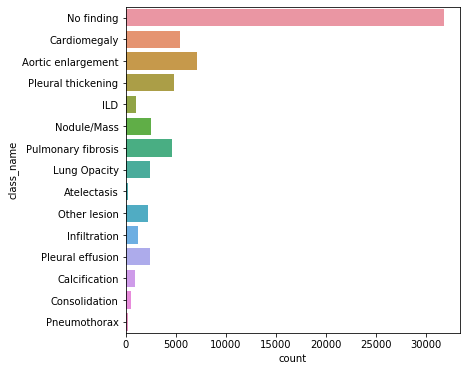

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(y='class_name',data=train)
plt.show()

In [15]:
train.image_id.value_counts()

03e6ecfa6f6fb33dfeac6ca4f9b459c9    57
fa109c087e46fe1ea27e48ce6d154d2f    52
e31be972e181987a8600a8700c1ebe88    48
6d5acf3f8a973a26844d617fffe72998    46
ecf474d5d4f65d7a3e23370a68b8c6a0    46
                                    ..
fe8f22bba9ea2e142143180563964e22     3
e462b73879d647c23796785533e25e1f     3
e51f4e56fc5e970b796959961c10ce26     3
e254b92ab7c0d3f3d332ac04e063c571     3
fd8bd7efba38113c2848079bab15f193     3
Name: image_id, Length: 15000, dtype: int64

# Label without No Finding

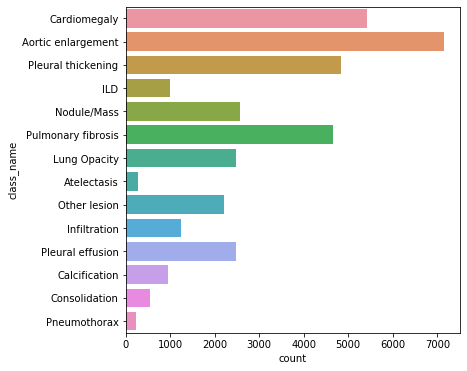

In [8]:
plt.figure(figsize=(6,6))
sns.countplot(y='class_name',data=train[train['class_name'] != 'No finding']);
plt.show()


In [14]:
train[train['class_name'] != 'No finding'].image_id.value_counts()

03e6ecfa6f6fb33dfeac6ca4f9b459c9    57
fa109c087e46fe1ea27e48ce6d154d2f    52
e31be972e181987a8600a8700c1ebe88    48
3a302fbbbf3364aa1a7731b59e6b98ec    46
6d5acf3f8a973a26844d617fffe72998    46
                                    ..
6d3cd7503968e1d95d46dccb35e6b617     3
ce99128124dc2e9cb8795a06342c00a2     3
f1a700126451c58e895df07f90c8b1ee     3
aaae825ac199f7a07b03af4622b1746e     3
52fe2f01573413223b1f7edee17de341     3
Name: image_id, Length: 4394, dtype: int64

In [27]:
train[train['class_name'] != 'No finding'].x_max.sort_values()
train[train['class_name'] != 'No finding'].y_max.sort_values()

33099     103.0
42563     122.0
65397     127.0
55466     134.0
43014     137.0
          ...  
12556    3282.0
28355    3282.0
8178     3311.0
43866    3353.0
24127    3384.0
Name: y_max, Length: 36096, dtype: float64

# Different Rad

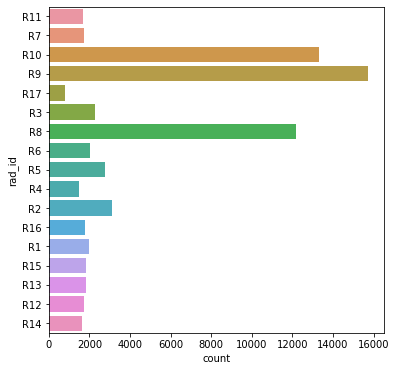

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(y='rad_id',data=train)
plt.show()

# Heatmap

In [75]:

def fill_heatmap(hm,x_min,y_min, x_max, y_max):
    hm[int(x_min):int(x_max),int(y_min):int(y_max)] += 1
hm = []
class_name = []
for i,name in enumerate(train[train['class_name'] != 'No finding']['class_name'].unique()):
    hm.append(np.zeros((3200,3400)))
    class_name.append(name)
    count = 0
    for item in train[train['class_name'] == name].iterrows():
        count += 1
        fill_heatmap(hm[i], item[1]['x_min'],item[1]['y_min'],item[1]['x_max'],item[1]['y_max'])



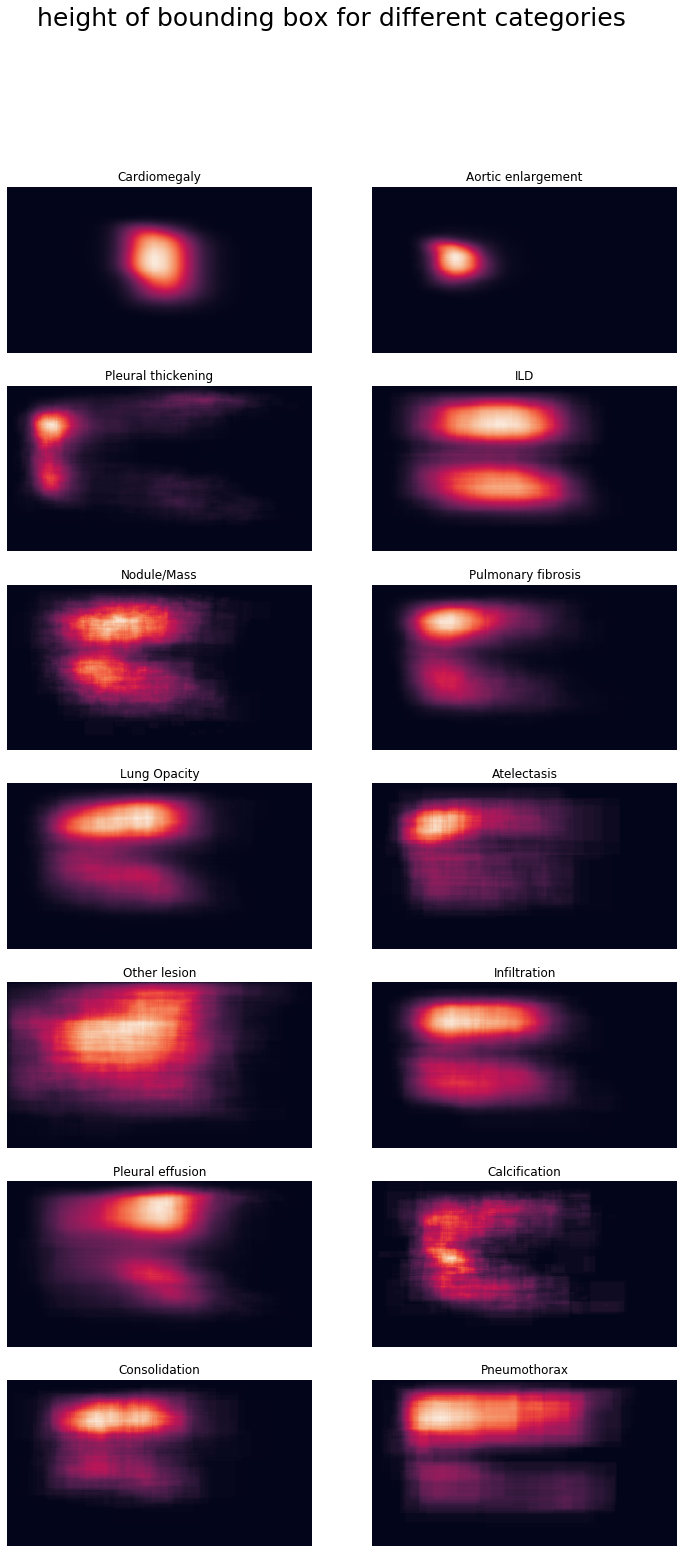

In [76]:
fig,ax = plt.subplots(7,2, figsize=(12,25))
fig.suptitle('height of bounding box for different categories',fontsize=25)
for i, item in enumerate(hm):
    ax[int(i/2)][i%2].set_title(class_name[i])
    sns.heatmap(hm[i], ax = ax[int(i/2)][i%2],xticklabels = False, yticklabels= False,cbar = False)
plt.show()